<a href="https://colab.research.google.com/github/saishshinde15/TensorFlow/blob/main/Grid_Search_for_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
tf.__version__

'2.15.0'

In [181]:
dataset=pd.read_csv('Dataset_CyberCrime_Sean.csv')

In [182]:
dataset

,City,Personal Revenge,Anger,Fraud,Extortion,Causing Disrepute,Prank,Sexual Exploitation,Disrupt Public Service,Sale purchase illegal drugs,Developing own business,Spreading Piracy,Psycho or Pervert,Steal Information,Abetment to Suicide,Others,Total
0,Agra,5.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,70.0
1,Allahabad,0.0,0.0,222.0,11.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241.0
2,Amritsar,2.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
3,Asansol,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,21.0
4,Aurangabad,5.0,2.0,51.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Ladakh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
187,Lakshadweep,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
188,Puducherry,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,10.0
189,Total UT(s),7.0,8.0,67.0,29.0,28.0,2.0,44.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,126.0,327.0


In [183]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         190 non-null    object 
 1   Personal Revenge             190 non-null    float64
 2   Anger                        190 non-null    float64
 3   Fraud                        190 non-null    float64
 4   Extortion                    190 non-null    float64
 5   Causing Disrepute            190 non-null    float64
 6   Prank                        190 non-null    float64
 7   Sexual Exploitation          190 non-null    float64
 8   Disrupt Public Service       190 non-null    float64
 9   Sale purchase illegal drugs  190 non-null    float64
 10  Developing own business      190 non-null    float64
 11  Spreading Piracy             190 non-null    float64
 12  Psycho or Pervert            190 non-null    float64
 13  Steal Information   

In [184]:
dataset.describe()

,Personal Revenge,Anger,Fraud,Extortion,Causing Disrepute,Prank,Sexual Exploitation,Disrupt Public Service,Sale purchase illegal drugs,Developing own business,Spreading Piracy,Psycho or Pervert,Steal Information,Abetment to Suicide,Others,Total
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,65.084211,40.926316,1337.942105,98.731579,92.210526,35.847368,143.642105,3.126316,0.710526,11.763158,13.952632,0.347368,2.857895,0.110526,397.968421,2279.057895
std,223.854812,134.835211,4629.658481,347.415837,308.814524,175.976949,475.216696,11.653500,2.806907,37.414477,82.097393,1.903872,13.303372,0.661404,1367.175356,7683.505487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.250000
50%,4.000000,2.000000,44.000000,6.000000,3.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.500000,131.500000
75%,16.000000,10.750000,346.000000,25.000000,25.000000,4.000000,57.750000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,120.500000,771.500000
max,1470.000000,822.000000,30142.000000,2440.000000,1874.000000,1385.000000,3293.000000,92.000000,21.000000,210.000000,671.000000,17.000000,93.000000,5.000000,8814.000000,50035.000000


In [185]:
dataset.isnull().sum()

City                           1
Personal Revenge               1
Anger                          1
Fraud                          1
Extortion                      1
Causing Disrepute              1
Prank                          1
Sexual Exploitation            1
Disrupt Public Service         1
Sale purchase illegal drugs    1
Developing own business        1
Spreading Piracy               1
Psycho or Pervert              1
Steal Information              1
Abetment to Suicide            1
Others                         1
Total                          1
dtype: int64

<ipython-input-186-aa6664222663>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<Axes: >

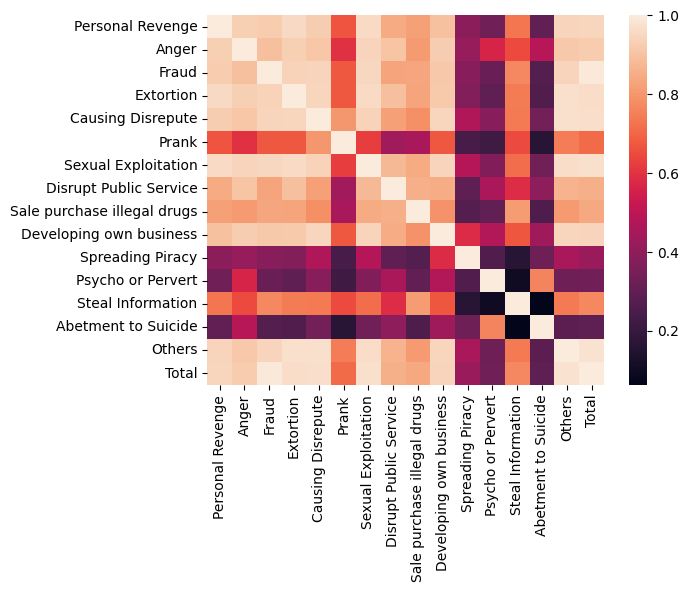

In [186]:
sns.heatmap(dataset.corr())

In [187]:
dataset

,City,Personal Revenge,Anger,Fraud,Extortion,Causing Disrepute,Prank,Sexual Exploitation,Disrupt Public Service,Sale purchase illegal drugs,Developing own business,Spreading Piracy,Psycho or Pervert,Steal Information,Abetment to Suicide,Others,Total
0,Agra,5.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,70.0
1,Allahabad,0.0,0.0,222.0,11.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241.0
2,Amritsar,2.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
3,Asansol,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,21.0
4,Aurangabad,5.0,2.0,51.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Ladakh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
187,Lakshadweep,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
188,Puducherry,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,10.0
189,Total UT(s),7.0,8.0,67.0,29.0,28.0,2.0,44.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,126.0,327.0


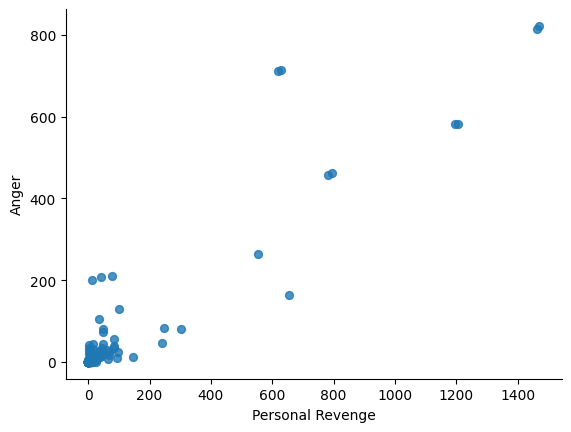

In [188]:
# @title Personal Revenge vs Anger

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='Personal Revenge', y='Anger', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

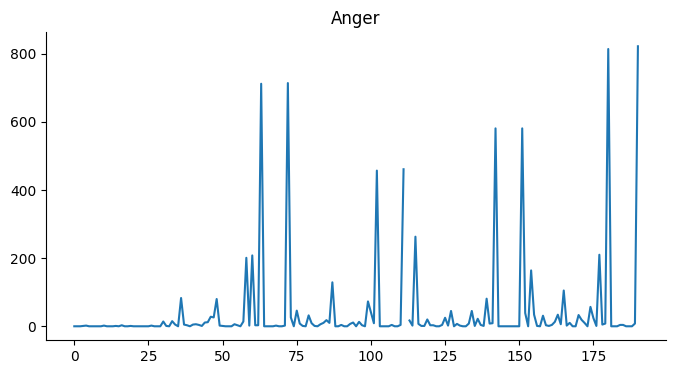

In [189]:
# @title Anger

from matplotlib import pyplot as plt
dataset['Anger'].plot(kind='line', figsize=(8, 4), title='Anger')
plt.gca().spines[['top', 'right']].set_visible(False)

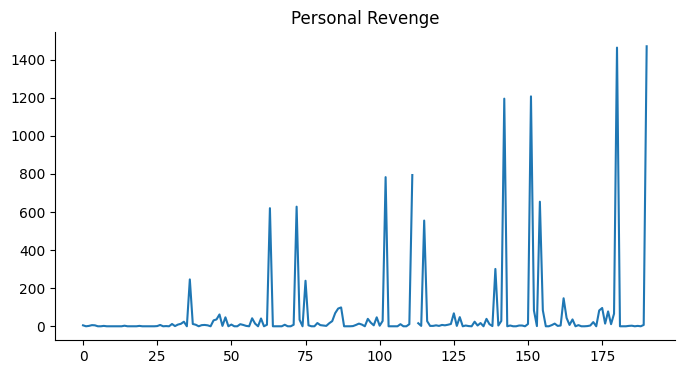

In [190]:
# @title Personal Revenge

from matplotlib import pyplot as plt
dataset['Personal Revenge'].plot(kind='line', figsize=(8, 4), title='Personal Revenge')
plt.gca().spines[['top', 'right']].set_visible(False)

In [191]:
dataset

,City,Personal Revenge,Anger,Fraud,Extortion,Causing Disrepute,Prank,Sexual Exploitation,Disrupt Public Service,Sale purchase illegal drugs,Developing own business,Spreading Piracy,Psycho or Pervert,Steal Information,Abetment to Suicide,Others,Total
0,Agra,5.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,70.0
1,Allahabad,0.0,0.0,222.0,11.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241.0
2,Amritsar,2.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
3,Asansol,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,21.0
4,Aurangabad,5.0,2.0,51.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Ladakh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
187,Lakshadweep,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
188,Puducherry,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,10.0
189,Total UT(s),7.0,8.0,67.0,29.0,28.0,2.0,44.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,126.0,327.0


In [192]:
dataset = dataset.drop(dataset.loc[dataset['City'] == 'Total All India'].index)

In [193]:
dataset=dataset.drop(['Total'],axis=1)

In [194]:
dataset

,City,Personal Revenge,Anger,Fraud,Extortion,Causing Disrepute,Prank,Sexual Exploitation,Disrupt Public Service,Sale purchase illegal drugs,Developing own business,Spreading Piracy,Psycho or Pervert,Steal Information,Abetment to Suicide,Others
0,Agra,5.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0
1,Allahabad,0.0,0.0,222.0,11.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Amritsar,2.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Asansol,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
4,Aurangabad,5.0,2.0,51.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Jammu & Kashmir,3.0,4.0,33.0,9.0,28.0,2.0,12.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,14.0
186,Ladakh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187,Lakshadweep,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
188,Puducherry,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [195]:
dataset.isnull().sum()

City                           1
Personal Revenge               1
Anger                          1
Fraud                          1
Extortion                      1
Causing Disrepute              1
Prank                          1
Sexual Exploitation            1
Disrupt Public Service         1
Sale purchase illegal drugs    1
Developing own business        1
Spreading Piracy               1
Psycho or Pervert              1
Steal Information              1
Abetment to Suicide            1
Others                         1
dtype: int64

In [196]:
X=dataset.iloc[:,1:16].values

In [197]:
X

array([[  5.,   0.,  19., ...,   0.,   0.,  46.],
       [  0.,   0., 222., ...,   0.,   0.,   0.],
       [  2.,   0.,   5., ...,   0.,   0.,   0.],
       ...,
       [  2.,   0.,   0., ...,   0.,   0.,   1.],
       [  0.,   0.,   4., ...,   0.,   0.,   3.],
       [  7.,   8.,  67., ...,   0.,   0., 126.]])

In [198]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 0:15])
X[:, 0:15] = imputer.transform(X[:, 0:15])

In [199]:
y=dataset['City'].values

In [200]:
y

array(['Agra', 'Allahabad', 'Amritsar', 'Asansol', 'Aurangabad', 'Bhopal',
       'Chandigarh City', 'Dhanbad', 'Durg-Bhilainagar', 'Faridabad',
       'Gwalior', 'Jabalpur', 'Jamshedpur', 'Jodhpur', 'Kannur', 'Kollam',
       'Kota', 'Ludhiana', 'Madurai', 'Malappuram', 'Meerut', 'Nasik',
       'Raipur', 'Rajkot', 'Ranchi', 'Srinagar', 'Thiruvananthapuram',
       'Thrissur', 'Tiruchirapalli', 'Vadodara', 'Varanasi',
       'Vasai Virar', 'Vijayawada', 'Vishakhapatnam', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'Total State(s)', 'A&N Islands', 'Chandigarh',
       'D&N Haveli', 'Daman & Diu', 'Delhi

In [275]:
# prompt: missing value treatment for y

import numpy as np
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(y.reshape(-1, 1))
y = imputer.transform(y.reshape(-1, 1))


In [276]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [277]:
y

array([ 2,  3,  4,  7,  9, 10, 13, 20, 21, 22, 25, 28, 30, 32, 33, 36, 37,
       40, 42, 44, 46, 50, 54, 56, 57, 59, 65, 66, 67, 73, 74, 75, 76, 77,
        5,  6,  8, 11, 14, 23, 24, 26, 27, 29, 31, 34, 35, 41, 43, 45, 47,
       48, 49, 51, 53, 55, 58, 63, 64, 70, 71, 72, 78, 68,  1, 12, 17, 18,
       19, 39, 52, 69,  5,  6,  8, 11, 14, 23, 24, 26, 27, 29, 31, 34, 35,
       41, 43, 45, 47, 48, 49, 51, 53, 55, 58, 63, 64, 70, 71, 72, 78, 68,
        1, 12, 17, 18, 19, 39, 52, 69, 79,  5,  6,  8, 11, 14, 23, 24, 26,
       27, 29, 31, 34, 35, 41, 43, 45, 47, 48, 49, 51, 53, 55, 58, 63, 64,
       70, 71, 72, 78, 61,  0, 12, 15, 18, 19, 39, 52, 62, 60,  5,  6,  8,
       11, 14, 23, 24, 26, 27, 31, 34, 35, 41, 43, 45, 47, 48, 49, 51, 53,
       55, 58, 63, 64, 70, 71, 72, 78, 68,  0, 12, 16, 19, 29, 38, 39, 52,
       69])

In [278]:
len(y) ## for softmax the neurons will be 188+1=189 as it start from zero(0)

188

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [205]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [206]:
len(X_train) ## batch_size (using Full batch)

150

In [207]:
ann=tf.keras.models.Sequential()

In [208]:
ann.add(tf.keras.layers.Dense(units=100,activation='relu'))

In [209]:
ann.add(tf.keras.layers.Dense(units=50,activation='relu'))

In [210]:
ann.add(tf.keras.layers.Dense(units=189,activation='softmax'))

In [211]:
ann.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [212]:
history=ann.fit(X_train,y_train,batch_size=150,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
1/1 [==============================] - 12s 12s/step - loss: 5.2924 - accuracy: 0.0067 - val_loss: 5.2660 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 74ms/step - loss: 5.2735 - accuracy: 0.0067 - val_loss: 5.2611 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 76ms/step - loss: 5.2554 - accuracy: 0.0067 - val_loss: 5.2561 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 83ms/step - loss: 5.2380 - accuracy: 0.0067 - val_loss: 5.2510 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 78ms/step - loss: 5.2212 - accuracy: 0.0067 - val_loss: 5.2461 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 75ms/step - loss: 5.2050 - accuracy: 0.0067 - val_loss: 5.2414 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 92ms/step - loss: 5.1893 - accuracy: 0.0067 - val_loss: 5.2365 - val_accuracy: 0.0

In [213]:
model1_eval=ann.evaluate(X_test,y_test)

2/2 [==============================] - 0s 9ms/step - loss: 5.3763 - accuracy: 0.0526


In [214]:
model1_train=ann.evaluate(X_train,y_train)

5/5 [==============================] - 1s 242ms/step - loss: 3.3277 - accuracy: 0.2400


<Axes: >

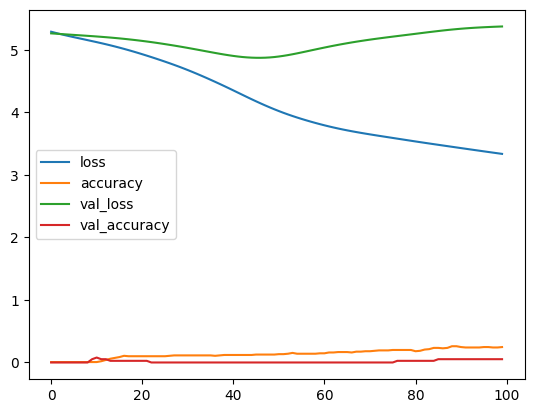

In [215]:
pd.DataFrame(history.history).plot()

In [216]:
## model 2 increasing the number of neurons

In [217]:
ann2=tf.keras.models.Sequential()

In [218]:
ann2.add(tf.keras.layers.Dense(units=100,activation='relu'))

In [219]:
ann2.add(tf.keras.layers.Dense(units=100,activation='relu'))

In [220]:
ann2.add(tf.keras.layers.Dense(units=189,activation='softmax'))

In [221]:
ann2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [222]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [223]:
history2=ann2.fit(X_train,y_train,batch_size=150,epochs=200,validation_data=(X_test,y_test),callbacks=[lr_scheduler])

Epoch 1/200
1/1 [==============================] - 7s 7s/step - loss: 5.2950 - accuracy: 0.0000e+00 - val_loss: 5.2290 - val_accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/200
1/1 [==============================] - 0s 63ms/step - loss: 5.2916 - accuracy: 0.0000e+00 - val_loss: 5.2277 - val_accuracy: 0.0000e+00 - lr: 1.1220e-04
Epoch 3/200
1/1 [==============================] - 0s 43ms/step - loss: 5.2878 - accuracy: 0.0000e+00 - val_loss: 5.2262 - val_accuracy: 0.0000e+00 - lr: 1.2589e-04
Epoch 4/200
1/1 [==============================] - 0s 63ms/step - loss: 5.2836 - accuracy: 0.0000e+00 - val_loss: 5.2245 - val_accuracy: 0.0000e+00 - lr: 1.4125e-04
Epoch 5/200
1/1 [==============================] - 0s 43ms/step - loss: 5.2789 - accuracy: 0.0000e+00 - val_loss: 5.2226 - val_accuracy: 0.0000e+00 - lr: 1.5849e-04
Epoch 6/200
1/1 [==============================] - 0s 85ms/step - loss: 5.2737 - accuracy: 0.0000e+00 - val_loss: 5.2205 - val_accuracy: 0.0000e+00 - lr: 1.7783e-04
Epoch 7/200


In [224]:
model2_eval=ann2.evaluate(X_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 1594379.1250 - accuracy: 0.0000e+00


In [225]:
model2_train=ann2.evaluate(X_train,y_train)

5/5 [==============================] - 0s 3ms/step - loss: 1801361.2500 - accuracy: 0.0267


In [226]:
model_result=(['model1',model1_eval,
               'model2',model2_eval])

In [227]:
model_result

['model1',
 [5.376328468322754, 0.05263157933950424],
 'model2',
 [1594379.125, 0.0]]

In [228]:
model_train=(['model1',model1_train,
               'model2',model2_train])

In [229]:
model_train

['model1',
 [3.327691078186035, 0.23999999463558197],
 'model2',
 [1801361.25, 0.02666666731238365]]

<Axes: >

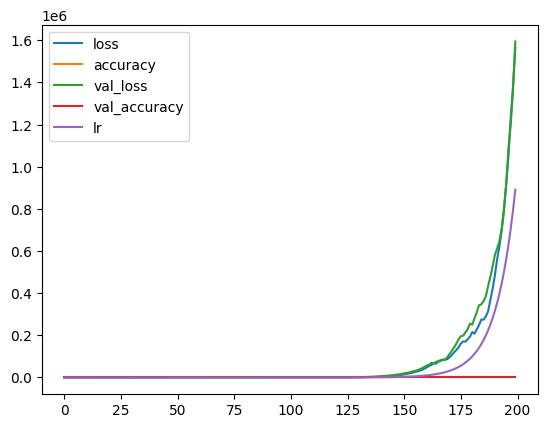

In [230]:
pd.DataFrame(history2.history).plot()

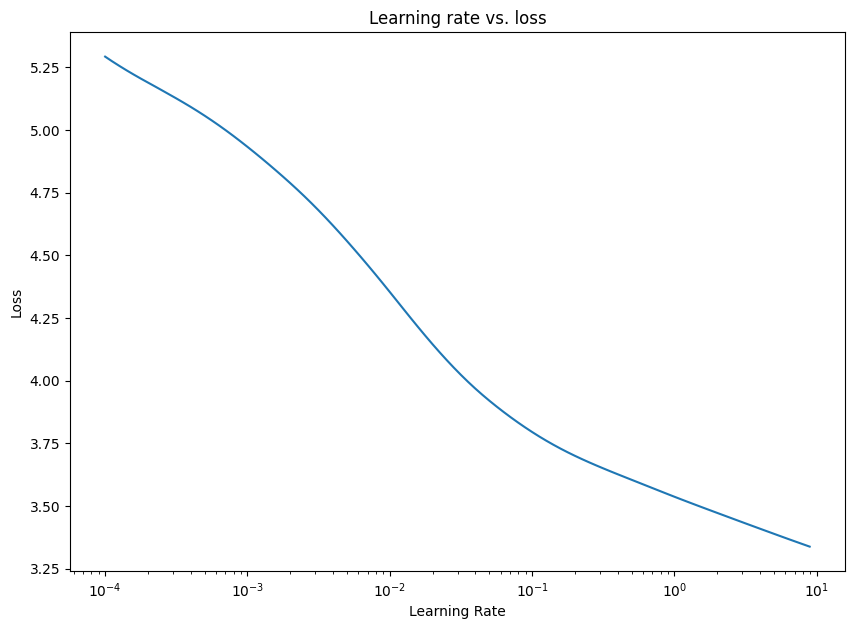

In [231]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [236]:
pip install scikeras


In [238]:
pip install bayesian-optimization

In [253]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [265]:
score_acc = make_scorer(accuracy_score)

In [273]:
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
                 'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
                 'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
                 'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', 'LeakyReLU','relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=15, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(189, activation='softmax')) ### use 1 instead of 189 and sigmoid/relu for clasification and regression respectively
        nn.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [ ]:
params_nn2 ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

In [ ]:
params_nn_ = nn_bo.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
             'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
             'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]
params_nn_

In [ ]:
# Fitting Neural Network
def nn_cl_fun():
nn = Sequential()
nn.add(Dense(params_nn_['neurons'], input_dim=10, activation=params_nn_['activation']))
    if params_nn_['normalization'] > 0.5:
nn.add(BatchNormalization())
    for i in range(params_nn_['layers1']):
nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    if params_nn_['dropout'] > 0.5:
nn.add(Dropout(params_nn_['dropout_rate'], seed=123))
    for i in range(params_nn_['layers2']):
nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer=params_nn_['optimizer'], metrics=['accuracy'])
    return nn
es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
nn = KerasClassifier(build_fn=nn_cl_fun, epochs=params_nn_['epochs'], batch_size=params_nn_['batch_size'],
                         verbose=0)
 nn.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=1)

In [280]:
#credits:https://www.analyticsvidhya.com/blog/2021/05/tuning-the-hyperparameters-and-layers-of-neural-network-deep-learning/